In [1]:
import os
import random
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Disable symlink warnings
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

c:\python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

x_train_embeddings = model.encode(train_emoticon_X)
x_val_embeddings = model.encode(valid_emoticon_X)

In [4]:
percentages = [20, 40, 60, 80, 100]
accuracies = []

In [5]:
for percent in percentages:
    n_samples = int(len(x_train_embeddings) * percent / 100)

    x_train_subset = x_train_embeddings[:n_samples]
    y_train_subset = train_emoticon_Y[:n_samples]

    svm_model = SVC(C=1, kernel='linear')  # C is the regularization parameter
    print(f"Training with {percent}% of data ({n_samples} samples)") # for debugging
    svm_model.fit(x_train_subset, y_train_subset)

    predicted_labels = svm_model.predict(x_val_embeddings)

    accuracy = accuracy_score(valid_emoticon_Y, predicted_labels)
    print(f"Accuracy with {percent}% training data: {accuracy:.2f}") # for debugging
    accuracies.append(accuracy)

Training with 20% of data (1416 samples)
Accuracy with 20% training data: 0.52
Training with 40% of data (2832 samples)
Accuracy with 40% training data: 0.48
Training with 60% of data (4248 samples)
Accuracy with 60% training data: 0.52
Training with 80% of data (5664 samples)
Accuracy with 80% training data: 0.52
Training with 100% of data (7080 samples)
Accuracy with 100% training data: 0.52


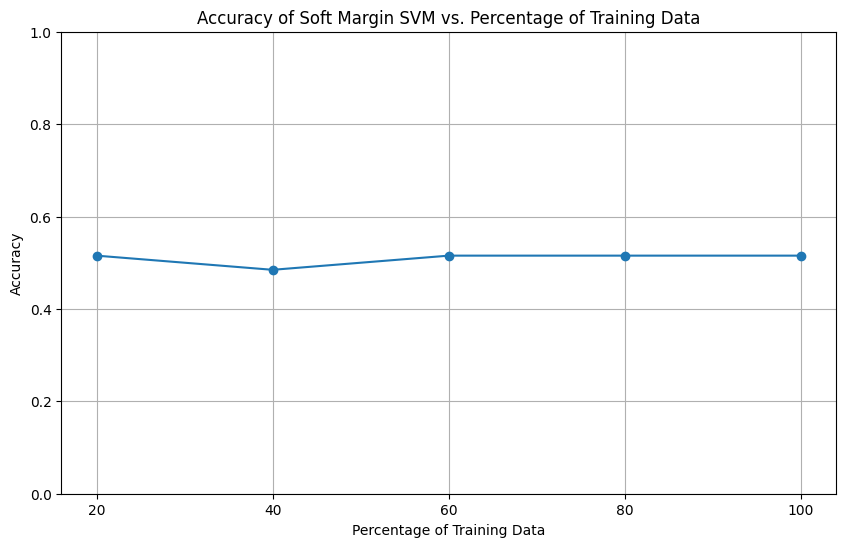

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(percentages, accuracies, marker='o')
plt.title('Accuracy of Soft Margin SVM vs. Percentage of Training Data')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.xticks(percentages)
plt.ylim(0, 1)
plt.grid()
plt.show()